In [137]:
import pandas as pd
import requests
import json
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Get pageviews data from Wikimedia API

In [7]:
url = "https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/all-access/all-agents/daily/2018010100/2020060100"
headers = {"accept": "application/json"}

In [3]:
type(headers)

dict

In [6]:
json.dumps(headers)

'{"accept": "application/json"}'

In [9]:
response = requests.get(url=url, headers=headers)

In [11]:
response.headers

{'cache-control': 's-maxage=86400, max-age=86400', 'content-type': 'application/json; charset=utf-8', 'x-request-id': 'd87ac708-a727-4cba-89a9-8bc2036f92a9', 'server': 'restbase1024', 'date': 'Tue, 16 Jun 2020 08:11:57 GMT', 'access-control-allow-origin': '*', 'access-control-allow-methods': 'GET,HEAD', 'access-control-allow-headers': 'accept, content-type, content-length, cache-control, accept-language, api-user-agent, if-match, if-modified-since, if-none-match, dnt, accept-encoding', 'access-control-expose-headers': 'etag', 'x-content-type-options': 'nosniff', 'x-frame-options': 'SAMEORIGIN', 'referrer-policy': 'origin-when-cross-origin', 'x-xss-protection': '1; mode=block', 'content-security-policy': "default-src 'none'; frame-ancestors 'none'", 'x-content-security-policy': "default-src 'none'; frame-ancestors 'none'", 'x-webkit-csp': "default-src 'none'; frame-ancestors 'none'", 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'Age': '792', 'X-Cache': 'cp3050 miss, cp3058 hit

In [29]:
df = pd.DataFrame(response.json()["items"])
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,all-agents,daily,2018010100,302828330
1,en.wikipedia,all-access,all-agents,daily,2018010200,319485738
2,en.wikipedia,all-access,all-agents,daily,2018010300,322019675
3,en.wikipedia,all-access,all-agents,daily,2018010400,314645741
4,en.wikipedia,all-access,all-agents,daily,2018010500,310155899


In [30]:
df.dtypes

project        object
access         object
agent          object
granularity    object
timestamp      object
views           int64
dtype: object

In [40]:
df["timestamp"]

0      2018010100
1      2018010200
2      2018010300
3      2018010400
4      2018010500
          ...    
878    2020052800
879    2020052900
880    2020053000
881    2020053100
882    2020060100
Name: timestamp, Length: 883, dtype: object

In [41]:
# tell pandas how to interpret the format
pd.to_datetime(df["timestamp"], format="%Y%m%d%H")

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
878   2020-05-28
879   2020-05-29
880   2020-05-30
881   2020-05-31
882   2020-06-01
Name: timestamp, Length: 883, dtype: datetime64[ns]

In [50]:
df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")

----
## Vectorized operations

In [45]:
for value in df["timestamp"]:
    print(value[:8])

20180101
20180102
20180103
20180104
20180105
20180106
20180107
20180108
20180109
20180110
20180111
20180112
20180113
20180114
20180115
20180116
20180117
20180118
20180119
20180120
20180121
20180122
20180123
20180124
20180125
20180126
20180127
20180128
20180129
20180130
20180131
20180201
20180202
20180203
20180204
20180205
20180206
20180207
20180208
20180209
20180210
20180211
20180212
20180213
20180214
20180215
20180216
20180217
20180218
20180219
20180220
20180221
20180222
20180223
20180224
20180225
20180226
20180227
20180228
20180301
20180302
20180303
20180304
20180305
20180306
20180307
20180308
20180309
20180310
20180311
20180312
20180313
20180314
20180315
20180316
20180317
20180318
20180319
20180320
20180321
20180322
20180323
20180324
20180325
20180326
20180327
20180328
20180329
20180330
20180331
20180401
20180402
20180403
20180404
20180405
20180406
20180407
20180408
20180409
20180410
20180411
20180412
20180413
20180414
20180415
20180416
20180417
20180418
20180419
20180420
20180421
2

In [46]:
df["timestamp"].apply(lambda x: x[:8])

0      20180101
1      20180102
2      20180103
3      20180104
4      20180105
         ...   
878    20200528
879    20200529
880    20200530
881    20200531
882    20200601
Name: timestamp, Length: 883, dtype: object

In [49]:
df["timestamp"].str.slice(0,8)

0      20180101
1      20180102
2      20180103
3      20180104
4      20180105
         ...   
878    20200528
879    20200529
880    20200530
881    20200531
882    20200601
Name: timestamp, Length: 883, dtype: object

---

In [51]:
df.dtypes

project                object
access                 object
agent                  object
granularity            object
timestamp      datetime64[ns]
views                   int64
dtype: object

In [52]:
df.head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,all-access,all-agents,daily,2018-01-01,302828330
1,en.wikipedia,all-access,all-agents,daily,2018-01-02,319485738
2,en.wikipedia,all-access,all-agents,daily,2018-01-03,322019675
3,en.wikipedia,all-access,all-agents,daily,2018-01-04,314645741
4,en.wikipedia,all-access,all-agents,daily,2018-01-05,310155899


We want to be able to split the pageviews by different `access-type`s. Our data is already aggregated, so we cannot break it down. Instead, we have to get the data for each `access-type` individually.

In [93]:
def get_wiki_pvs(access_type):
    url = f"https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/en.wikipedia.org/{access_type}/all-agents/daily/2018010100/2020053100"
    resp = requests.get(url, {"accept": "application/json"})
    df = pd.DataFrame(resp.json()["items"])
    df["timestamp"] = pd.to_datetime(df["timestamp"], format="%Y%m%d%H")
    
    return df

In [94]:
access_types = ["desktop", "mobile-web", "mobile-app"]
data = {at: get_wiki_pvs(at) for at in access_types}

In [95]:
data["desktop"].head()

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2018-01-01,149207888
1,en.wikipedia,desktop,all-agents,daily,2018-01-02,176949374
2,en.wikipedia,desktop,all-agents,daily,2018-01-03,189221424
3,en.wikipedia,desktop,all-agents,daily,2018-01-04,181752882
4,en.wikipedia,desktop,all-agents,daily,2018-01-05,177118102


In [96]:
type(data)

dict

In [97]:
data["mobile-app"]

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,mobile-app,all-agents,daily,2018-01-01,5088222
1,en.wikipedia,mobile-app,all-agents,daily,2018-01-02,4432088
2,en.wikipedia,mobile-app,all-agents,daily,2018-01-03,3986792
3,en.wikipedia,mobile-app,all-agents,daily,2018-01-04,3943742
4,en.wikipedia,mobile-app,all-agents,daily,2018-01-05,3977314
...,...,...,...,...,...,...
877,en.wikipedia,mobile-app,all-agents,daily,2020-05-27,2824220
878,en.wikipedia,mobile-app,all-agents,daily,2020-05-28,2684137
879,en.wikipedia,mobile-app,all-agents,daily,2020-05-29,2619870
880,en.wikipedia,mobile-app,all-agents,daily,2020-05-30,2895091


In [98]:
df = (pd
      .concat([data["desktop"], data["mobile-app"], data["mobile-web"]], ignore_index=True)
      .sort_values(["timestamp", "access"]))
df

,project,access,agent,granularity,timestamp,views
0,en.wikipedia,desktop,all-agents,daily,2018-01-01,149207888
882,en.wikipedia,mobile-app,all-agents,daily,2018-01-01,5088222
1764,en.wikipedia,mobile-web,all-agents,daily,2018-01-01,148532220
1,en.wikipedia,desktop,all-agents,daily,2018-01-02,176949374
883,en.wikipedia,mobile-app,all-agents,daily,2018-01-02,4432088
...,...,...,...,...,...,...
1762,en.wikipedia,mobile-app,all-agents,daily,2020-05-30,2895091
2644,en.wikipedia,mobile-web,all-agents,daily,2020-05-30,166733558
881,en.wikipedia,desktop,all-agents,daily,2020-05-31,160837239
1763,en.wikipedia,mobile-app,all-agents,daily,2020-05-31,2875682


In [99]:
# aggregate all access types for each day
df.groupby("timestamp").agg({"views": "sum"})

,views
timestamp,
2018-01-01,302828330
2018-01-02,319485738
2018-01-03,322019675
2018-01-04,314645741
2018-01-05,310155899
...,...
2020-05-27,339741259
2020-05-28,333188866
2020-05-29,325485160


# 1. Daily total pageviews

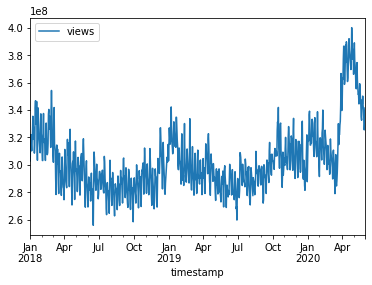

In [100]:
df.groupby("timestamp").agg({"views": "sum"}).plot();

# 2. Monthly total pageviews

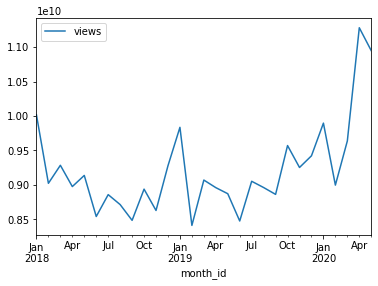

In [101]:
(df
 .assign(month_id=pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01")))
 .groupby("month_id")
 .agg({"views": "sum"})).plot();

# 3. Yearly total pageviews

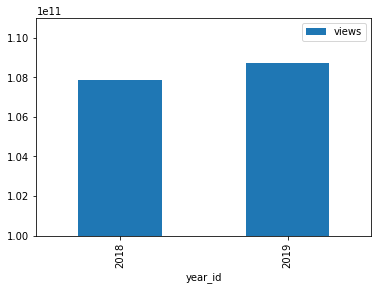

In [124]:
ax = (df
      .loc[df["timestamp"] < "2020-01-01"]
      .assign(year_id=df["timestamp"].dt.year)
      .groupby("year_id")
      .agg({"views": "sum"})).plot(kind="bar")

ax.set_ylim((100000000000,111000000000));

# 4. Monthly pageviews by access type

| month_id | access_type | pageviews |
|----------|-------------|-----------|
| 2018-01-01 | desktop | 983295739 |
| 2018-01-01 | mobile-web | 1025805 |
| 2018-01-01 | mobile-app | 4910259 |
| 2018-02-01 | desktop | 983295739 |
| ... | ... | ... |

In [130]:
(df
 .assign(month_id=pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01")))
 .groupby(["month_id", "access"])
 .agg({"views": "sum"})).unstack().head()

views                       
access         desktop mobile-app  mobile-web
month_id                                     
2018-01-01  5641867830  129767862  4243636453
2018-02-01  5166972694  112583124  3742094063
2018-03-01  5107725502  121792879  4053914835
2018-04-01  4930288569  119494188  3924637388
2018-05-01  4932408223  127894989  4075811128

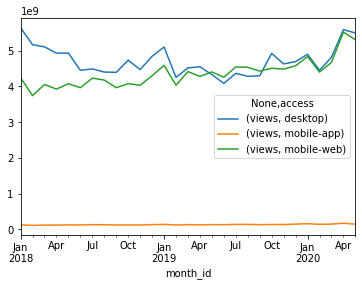

In [148]:
(df
 .assign(month_id=pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01")))
 .groupby(["month_id", "access"])
 .agg({"views": "sum"})).unstack().plot();

In [135]:
monthly_pvs = (df
               .assign(month_id=pd.to_datetime(df["timestamp"].dt.strftime("%Y-%m-01")))
               .groupby(["month_id", "access"], as_index=False)
               .agg({"views": "sum"}))
               
monthly_pvs

,month_id,access,views
0,2018-01-01,desktop,5641867830
1,2018-01-01,mobile-app,129767862
2,2018-01-01,mobile-web,4243636453
3,2018-02-01,desktop,5166972694
4,2018-02-01,mobile-app,112583124
...,...,...,...
82,2020-04-01,mobile-app,173211756
83,2020-04-01,mobile-web,5519152164
84,2020-05-01,desktop,5494118440
85,2020-05-01,mobile-app,148248926


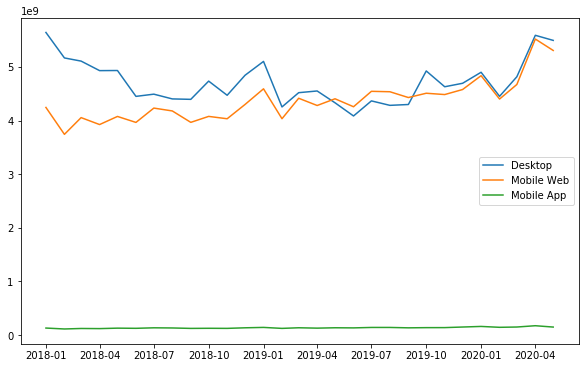

In [142]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(monthly_pvs.loc[monthly_pvs["access"] == "desktop", "month_id"],
        monthly_pvs.loc[monthly_pvs["access"] == "desktop", "views"],
        label="Desktop");

ax.plot(monthly_pvs.loc[monthly_pvs["access"] == "mobile-web", "month_id"],
        monthly_pvs.loc[monthly_pvs["access"] == "mobile-web", "views"],
        label="Mobile Web");

ax.plot(monthly_pvs.loc[monthly_pvs["access"] == "mobile-app", "month_id"],
        monthly_pvs.loc[monthly_pvs["access"] == "mobile-app", "views"],
        label="Mobile App");


plt.legend();